In [15]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_1d4d2f9f4be94c859ea7c54848b541e7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='**INSERT HERE**',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1d4d2f9f4be94c859ea7c54848b541e7.get_object(Bucket='kwmpyrcapstoneproject-donotdelete-pr-fboomnskntm9nf',Key='311_Service_Requests.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

requests = pd.read_csv(body)
requests.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-03-23T19:28:55.000,42034156,HEAT/HOT WATER,10032.0,835 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.836079,-73.946179,2019-03-27T08:17:34.000,RESIDENTIAL BUILDING,Closed
1,2019-03-23T17:05:17.000,42034212,UNSANITARY CONDITION,11225.0,348 MAPLE STREET,MAPLE STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.660905,-73.949222,2019-03-27T07:51:44.000,RESIDENTIAL BUILDING,Closed
2,2019-03-23T17:25:14.000,42034245,WATER LEAK,10460.0,783 GROTE STREET,GROTE STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.850269,-73.882685,2019-03-28T14:05:19.000,RESIDENTIAL BUILDING,Closed
3,2019-03-23T10:27:32.000,42034339,ELECTRIC,10468.0,2800 JEROME AVENUE,JEROME AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.870341,-73.894718,2019-04-08T10:08:17.000,RESIDENTIAL BUILDING,Closed
4,2019-03-23T18:07:09.000,42034377,PAINT/PLASTER,10453.0,1775 DAVIDSON AVENUE,DAVIDSON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.848813,-73.912720,NaN,RESIDENTIAL BUILDING,Open


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
heat = requests['complaint_type']=='HEAT/HOT WATER'
heat2= requests['complaint_type']=='HEATING'
bronx = requests['borough']=='BRONX'
heatbr = requests[(heat | heat2) & bronx]
heatbr.head()





,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
5,2019-03-23T20:16:25.000,42034451,HEAT/HOT WATER,10467.0,3280 ROCHAMBEAU AVENUE,ROCHAMBEAU AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.877404,-73.880713,2019-03-27T10:05:45.000,RESIDENTIAL BUILDING,Closed
7,2019-03-23T07:28:26.000,42034902,HEAT/HOT WATER,10460.0,921 EAST 180 STREET,EAST 180 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.844498,-73.881473,2019-03-27T02:08:00.000,RESIDENTIAL BUILDING,Closed
8,2019-03-23T05:43:39.000,42034938,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,2019-03-27T02:06:16.000,RESIDENTIAL BUILDING,Closed
9,2019-03-23T05:51:53.000,42034942,HEAT/HOT WATER,10462.0,2074 WALLACE AVENUE,WALLACE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.852670,-73.864860,2019-03-27T02:07:56.000,RESIDENTIAL BUILDING,Closed
10,2019-03-23T06:32:52.000,42034948,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,2019-03-27T02:06:16.000,RESIDENTIAL BUILDING,Closed


Next, I want to tally the total count of service requests by address. I rename the column from unique key to service requests for clarity. 

In [18]:


countdf = heatbr.groupby(['incident_address'])['incident_address'].agg({'Unique Key': 'count'})
countdf.rename(columns={'Unique Key': 'Service Requests'},inplace=True)
countdf.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


,Service Requests
incident_address,
1 ADRIAN AVENUE,39
1 CAROLL STREET,18
1 DOROTHEA PLACE,1
1 EARHART LANE,2
1 EAST 169 STREET,1


In [19]:
body = client_1d4d2f9f4be94c859ea7c54848b541e7.get_object(Bucket='kwmpyrcapstoneproject-donotdelete-pr-fboomnskntm9nf',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

bronx = pd.read_csv(body)
bronx.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


Let's take a look at the info around this dataset. 

In [20]:
bronx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 87 columns):
Borough                 89854 non-null object
Block                   89854 non-null int64
Lot                     89854 non-null int64
CD                      89854 non-null int64
CT2010                  89447 non-null float64
CB2010                  87342 non-null float64
SchoolDist              89695 non-null float64
Council                 89649 non-null float64
ZipCode                 89525 non-null float64
FireComp                89568 non-null object
PolicePrct              89692 non-null float64
HealthCenterDistrict    89727 non-null float64
HealthArea              89630 non-null float64
SanitBoro               89235 non-null float64
SanitDistrict           89238 non-null float64
SanitSub                88789 non-null object
Address                 89785 non-null object
ZoneDist1               89795 non-null object
ZoneDist2               2553 non-null object
ZoneDist3  

Based on the exercise guidance, I will grab only a subset of the columns found in the Bronx Pluto dataset and create a subset dataframe for further analysis

In [21]:
bronxsub = bronx[['Address', 'BldgArea','BldgDepth','BuiltFAR','CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]
bronxsub.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


Next, I will merge the 311 request dataframe containing the addresses and total service requests with the Bronx Pluto set that contains the aligned addresses and associated building characteristics. 

In [22]:
joindf = pd.merge(bronxsub, countdf, how='inner', left_on = 'Address', right_on = 'incident_address')
joindf.head()


,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,Service Requests
0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.00,1,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,2
1,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.00,1,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,13
2,147 BRUCKNER BOULEVARD,11500,96.0,4.60,2.0,3.0,45,2500,100.00,1,...,0,9176,3.00,2324,1925,0,10454.0,232154.0,1006412.0,95
3,169 BROOK AVENUE,2080,52.0,1.22,0.0,4.8,72,1700,85.06,1,...,0,2080,2.43,0,2000,0,10454.0,232909.0,1006189.0,1
4,167 BROOK AVENUE,2080,52.0,1.22,0.0,4.8,73,1700,85.06,1,...,0,2080,2.43,0,2000,0,10454.0,232892.0,1006179.0,1


Next, I check the object types as I will need int64 or float64 variables in order to run pearson correlation against the data. 

In [23]:
joindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16896 entries, 0 to 16895
Data columns (total 21 columns):
Address             16896 non-null object
BldgArea            16896 non-null int64
BldgDepth           16896 non-null float64
BuiltFAR            16896 non-null float64
CommFAR             16896 non-null float64
FacilFAR            16896 non-null float64
Lot                 16896 non-null int64
LotArea             16896 non-null int64
LotDepth            16896 non-null float64
NumBldgs            16896 non-null int64
NumFloors           16896 non-null float64
OfficeArea          16896 non-null int64
ResArea             16896 non-null int64
ResidFAR            16896 non-null float64
RetailArea          16896 non-null int64
YearBuilt           16896 non-null int64
YearAlter1          16896 non-null int64
ZipCode             16896 non-null float64
YCoord              16871 non-null float64
XCoord              16871 non-null float64
Service Requests    16896 non-null int64
dtypes: f

Next, I calculate the Pearson correlation of the int64 and float64 variables in the dataframe and display this in two forms - a heatmap and table. 

Text(0.5, 1.0, 'Correlation')

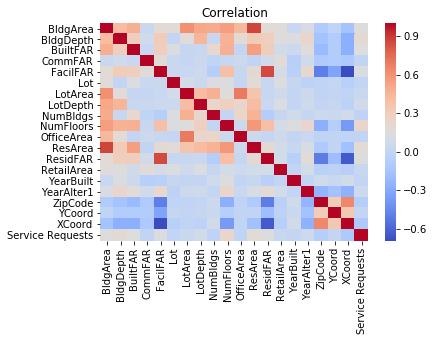

In [24]:
sns.heatmap(joindf.corr(),cmap='coolwarm')
plt.title('Correlation')

In [25]:
correlation = joindf.corr(method='pearson')
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)
correlation

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,Service Requests
BldgArea,1.000000,0.413667,0.479541,0.038098,0.192053,0.177432,0.611832,0.513065,0.501333,0.551465,0.426333,0.869118,0.187509,0.176337,0.028909,0.126839,-0.096745,-0.014251,-0.153706,0.155816
BldgDepth,0.413667,1.000000,0.297985,0.073264,0.317659,0.008465,0.179763,0.450480,0.026750,0.467876,0.191055,0.325715,0.296422,0.158461,0.139693,0.234947,-0.152224,-0.085258,-0.267909,0.194157
BuiltFAR,0.479541,0.297985,1.000000,0.034151,0.296406,0.131564,0.020594,0.027466,0.224850,0.474109,0.008372,0.552386,0.300881,0.079897,0.045620,0.177510,-0.206841,-0.078981,-0.268974,0.152439
CommFAR,0.038098,0.073264,0.034151,1.000000,0.169784,0.029881,0.015218,0.036086,-0.014613,0.025122,0.048681,-0.008657,0.077739,0.178344,-0.058453,0.073039,-0.097606,-0.089638,-0.114283,-0.008748
FacilFAR,0.192053,0.317659,0.296406,0.169784,1.000000,0.036084,0.033990,0.047882,-0.064823,0.386125,0.026150,0.200094,0.860054,0.107265,-0.051176,0.221550,-0.487107,-0.324266,-0.691470,0.130873
Lot,0.177432,0.008465,0.131564,0.029881,0.036084,1.000000,0.083093,0.047013,0.138092,0.138590,0.009568,0.182451,0.026870,0.139920,0.018449,-0.027332,-0.011520,0.009373,-0.050853,-0.001221
LotArea,0.611832,0.179763,0.020594,0.015218,0.033990,0.083093,1.000000,0.417768,0.471451,0.161475,0.694771,0.368796,0.024535,0.063077,0.006435,0.049290,-0.009153,0.005296,-0.016533,0.036577
LotDepth,0.513065,0.450480,0.027466,0.036086,0.047882,0.047013,0.417768,1.000000,0.229319,0.292186,0.232081,0.414481,0.031889,0.132788,0.006605,0.063650,0.003942,0.016564,-0.036343,0.076251
NumBldgs,0.501333,0.026750,0.224850,-0.014613,-0.064823,0.138092,0.471451,0.229319,1.000000,0.005396,0.240752,0.463428,-0.071439,0.016295,0.072255,0.012792,0.051746,0.036572,0.080692,-0.019184
NumFloors,0.551465,0.467876,0.474109,0.025122,0.386125,0.138590,0.161475,0.292186,0.005396,1.000000,0.050705,0.580693,0.395294,0.093254,0.142197,0.239085,-0.270462,-0.069463,-0.371331,0.236390


Next, I want to also take a look at the P-value to know the statistical significance of the correlation estimate. To start, I import the stats package and examine the  pearson coef and p_value between service requests and the building characteristic variables. 

In [26]:
from scipy import stats

In [27]:
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['BldgArea'])
print("The Pearson Correlation Coefficient for BldgArea", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['BldgDepth'])
print("The Pearson Correlation Coefficient for BldgDepth", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['BuiltFAR'])
print("The Pearson Correlation Coefficient BuiltFar", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['CommFAR'])
print("The Pearson Correlation Coefficient for CommFar", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['Lot'])
print("The Pearson Correlation Coefficient for Lot", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['LotArea'])
print("The Pearson Correlation Coefficient for Lot Area", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['LotDepth'])
print("The Pearson Correlation Coefficient for Lot Depth", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['NumBldgs'])
print("The Pearson Correlation Coefficient for Num Bldgs", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['NumFloors'])
print("The Pearson Correlation Coefficient for Num FLoors", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['OfficeArea'])
print("The Pearson Correlation Coefficient for Office Area", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['ResArea'])
print("The Pearson Correlation Coefficient for Res Area", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['ResidFAR'])
print("The Pearson Correlation Coefficient for Resid Far", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['RetailArea'])
print("The Pearson Correlation Coefficient for Retail Area", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['YearBuilt'])
print("The Pearson Correlation Coefficient for Year Built", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['YearAlter1'])
print("The Pearson Correlation Coefficient for Year ALter", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['ZipCode'])
print("The Pearson Correlation Coefficient for Zip Code", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['YCoord'])
print("The Pearson Correlation Coefficient for YCoord", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stats.pearsonr(joindf['Service Requests'], joindf['XCoord'])
print("The Pearson Correlation Coefficient for XCoord", pearson_coef, " with a P-value of P =", p_value) 





The Pearson Correlation Coefficient for BldgArea 0.15581645043146453  with a P-value of P = 2.6859031129385064e-92
The Pearson Correlation Coefficient for BldgDepth 0.19415710620298873  with a P-value of P = 3.4232573510194575e-143
The Pearson Correlation Coefficient BuiltFar 0.15243926961430002  with a P-value of P = 2.241427144198858e-88
The Pearson Correlation Coefficient for CommFar -0.008748240866734942  with a P-value of P = 0.2555072089627807
The Pearson Correlation Coefficient for Lot -0.001221040099060253  with a P-value of P = 0.8739015010676737
The Pearson Correlation Coefficient for Lot Area 0.03657733766971626  with a P-value of P = 1.9772992926172974e-06
The Pearson Correlation Coefficient for Lot Depth 0.0762508819537832  with a P-value of P = 3.235848969563702e-23
The Pearson Correlation Coefficient for Num Bldgs -0.01918395508018419  with a P-value of P = 0.012643217207163415
The Pearson Correlation Coefficient for Num FLoors 0.236390110347102  with a P-value of P = 2.

Looking to the Correlation values close to 1 (positive) or -1 (negative) and P Values <0.001, we will find those variables that have a statistically significant correlation on the amount of heating service requests. 

With these, I arrive at the following conclusion. 

NumFloors, ResArea, Resid Far, BuiltFar, Bldg Depth, Bldg Area all have influence. 